In [1]:
import os
import sys 
import glob
import dask
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

import cmcrameri.cm as cmc
import drama.utils as drtls
from drama.performance.sar.antenna_patterns import sinc_bp, phased_array

from dataclasses import dataclass
from typing import Callable, Union, List, Dict, Any
from leakage.velocity_leakage import S1DopplerLeakage, add_dca_to_leakage_class
from leakage.misc import round_to_hour, angular_difference, calculate_distance

In [2]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
save_dir = '../../data/leakage/temp/aghulas_east_v0.nc'

func_rmse = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)).values*1, rounding)
func_rmse_xr = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)), rounding)

# scenarios = [
#     'Aghulas_20200309',
#     'Aghulas_20200321',
#     'Aghulas_20200402',
#     'Aghulas_20200414',
#     'Aghulas_20200426'
#     ]

scenarios = [
    # # 'Aghulas_20200203',
    'Aghulas_20200215',
    'Aghulas_20200227',
    'Aghulas_20200310',
    'Aghulas_20200322',
    'Aghulas_20200403',
    'Aghulas_20200415',
    'Aghulas_20200427',
]

# When reprocessing

In [4]:
# noises = []
# signals = []
results = []
for i, scenario in enumerate(scenarios):
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=25_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=150,
        antenna_length=2.87,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=35,
        boresight_elevation_angle_scat=40,
        random_state = 42 + i, # NOTE random state changes per scene
        fill_nan_limit = None,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        # _speckle_noise= True
        )
    test.apply()

    data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
    files_dca = glob.glob(f"{data_dir_dca+scenario}/*.nc")
    
    add_dca_to_leakage_class(test, files_dca=files_dca)
    results.append(test)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:512: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200215/7D80_9061_A3F0_F5E9_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200215h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200227/AB12_C338_CC42_FD2F_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200227h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200310/432C_5968_914A_E7BA_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200310h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200322/53A3_CF10_DAC5_E02D_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200322h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200403/09A3_9D36_A648_D652_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200403h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200415/1AAE_53C5_7B19_DDF6_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200415h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200427/02F0_278B_ABCD_EC97_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200427h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

In [6]:
samples = results #results[:3] + [results[-1]] # results

residuals = [result.data.V_leakage_pulse_rg_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]
backscatters = [result.data.nrcs_scat for result in samples]
signals = [result.data.V_dca_pulse_rg_subscene for result in samples]
currents =  [result.data.V_dca_pulse_rg_subscene - result.data.V_wb_pulse_rg_subscene for result in samples]
noise = [result.data.V_sigma_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]

In [58]:
# ds_res = xr.Dataset()
# ds_res['residual'] = xr.concat(residuals, dim = 'time')
# ds_res['currents'] = xr.concat(currents, dim = 'time')
# ds_res['nrcs'] = xr.concat(backscatters, dim = 'time')
# ds_res['noise'] = xr.concat(noise, dim = 'time')

# ds_res.to_netcdf(save_dir)

# When reloading

In [84]:
ds_res = xr.open_dataset(save_dir)

clip_1 = ds_res['currents'].mean(dim='time', skipna=False)/ds_res['currents'].mean(dim='time', skipna=False)
clip_2 = ds_res['residual'].mean(dim='time', skipna=False)/ds_res['residual'].mean(dim='time', skipna=False)

clip_1_plotting = ds_res['currents']/ds_res['currents']
clip_2_plotting = ds_res['residual']/ds_res['residual']

ds_res['residual'] = ds_res['residual'] * clip_1 * clip_2 # clip_1  clip_1_plotting
ds_res['currents'] = ds_res['currents'] * clip_2 * clip_1 # clip_2  clip_2_plotting
ds_res['noise'] = ds_res['noise'] * clip_2 * clip_1

ds_residual_mean = ds_res['residual'].mean(dim = 'time')
ds_residual_std = ds_res['residual'].std(dim = 'time')
ds_noise_mean = ds_res['noise'].mean(dim = 'time')
ds_currents_mean = ds_res['currents'].mean(dim = 'time')

print('leakage:', ds_residual_mean.std().values*1, ds_res['residual'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values, '\n')
print('noise:', ds_noise_mean.std().values*1, ds_res['noise'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values, '\n')
print('signal:', ds_currents_mean.std().values*1, ds_res['currents'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values, '\n')

leakage: 0.2003103706564711 [0.56354258 0.62132056 0.43447714 0.40519902 0.35108176 0.56468763
 0.40404721] 

noise: 0.625812791363599 [1.46345703 1.57544918 1.75232767 1.58488453 1.45821875 1.55831717
 1.48265308] 

signal: 0.33195709315628413 [0.5260813  0.43661533 0.45500673 0.34428863 0.3817948  0.55218353
 0.42689188] 



In [85]:
# complete correlation
(np.mean(ds_res['residual'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values), np.mean(ds_res['noise'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values), np.mean(ds_res['currents'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values)) 

(0.47776513017296374, 1.5536153440243705, 0.44612316994324624)

In [86]:
# complete uncorrelated
((np.mean(ds_res['residual'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values), np.mean(ds_res['noise'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values), np.mean(ds_res['currents'].groupby('time',squeeze=False).std(dim=['slow_time', 'grg']).values)) )  / np.sqrt(ds_res.sizes['time']) 

array([0.18057825, 0.5872114 , 0.16861871])

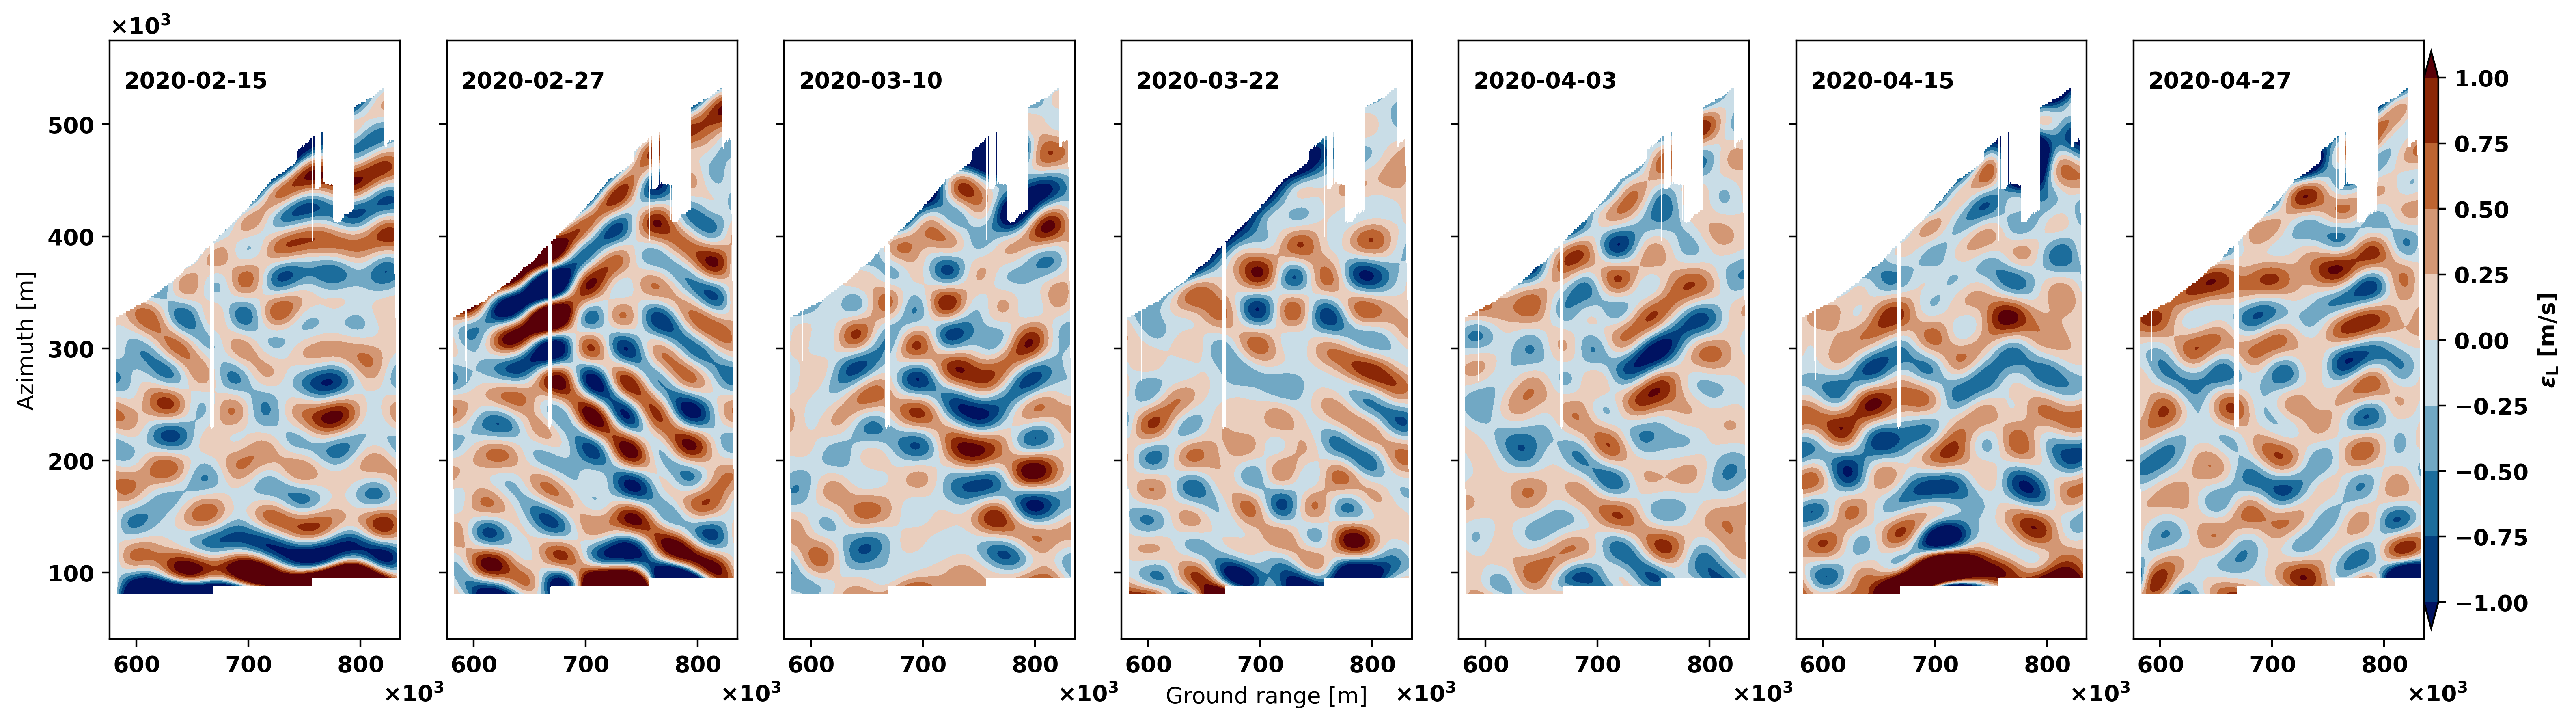

In [87]:
plt.rcParams.update({'font.size': 10, 'font.weight' : 'bold'})

# fig, axes = plt.subplots(ny, nx, figsize = (14, 6), sharex=True, sharey=True)
a = ds_res['residual'].sel(slow_time = slice(0, 575E3)).plot.contourf(x='grg', y = 'slow_time', col = 'time', 
                                                             vmin = -1,
                                                             vmax = 1,
                                                             levels = 9,
                                                             robust = True, 
                                                             cmap = cmc.vik, 
                                                             figsize = (18,6), 
                                                             cbar_kwargs = {'label':r'$\epsilon_{\mathrm{L}}\ \mathrm{[m/s]}$',
                                                                            'shrink':0.7,
                                                                            'aspect':40, 
                                                                            'pad' : 0.0, 
                                                                            'extend':'both'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]
_ = [ax.ticklabel_format(useMathText=True, axis = 'both', style='sci', scilimits=(3,3)) for ax in a.axs.ravel()]
nx = len(a.axs.ravel()); ny = 1
x_labels = [''] * 3 + ['Ground range [m]'] + [''] * 3 
y_labels = (['Azimuth [m]'] + [''] * (nx - 1)) * ny
# _ = [ax.axes.set_title(i) for ax, i in zip(axes.ravel(), titles)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(a.axs.ravel(), x_labels)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(a.axs.ravel(), x_labels)]
_ = [ax.axes.set_title('') for ax in a.axs.ravel()]
_ = [ax.axes.set_ylabel(i) for ax, i in zip(a.axs.ravel(), y_labels)]
_ = [ax.axes.get_xaxis().get_offset_text().set_position((1.15,40)) for ax in a.axs.ravel()]
labels = [f'{i[8:12]}-{i[12:14]}-{i[14:16]}' for i in scenarios]
_ = [ax.text(0.05, 0.95, label, fontsize=10, transform=ax.transAxes, va='top') for ax, label in zip(a.axs.ravel(), labels)]

a.fig.set_dpi(400.0) 

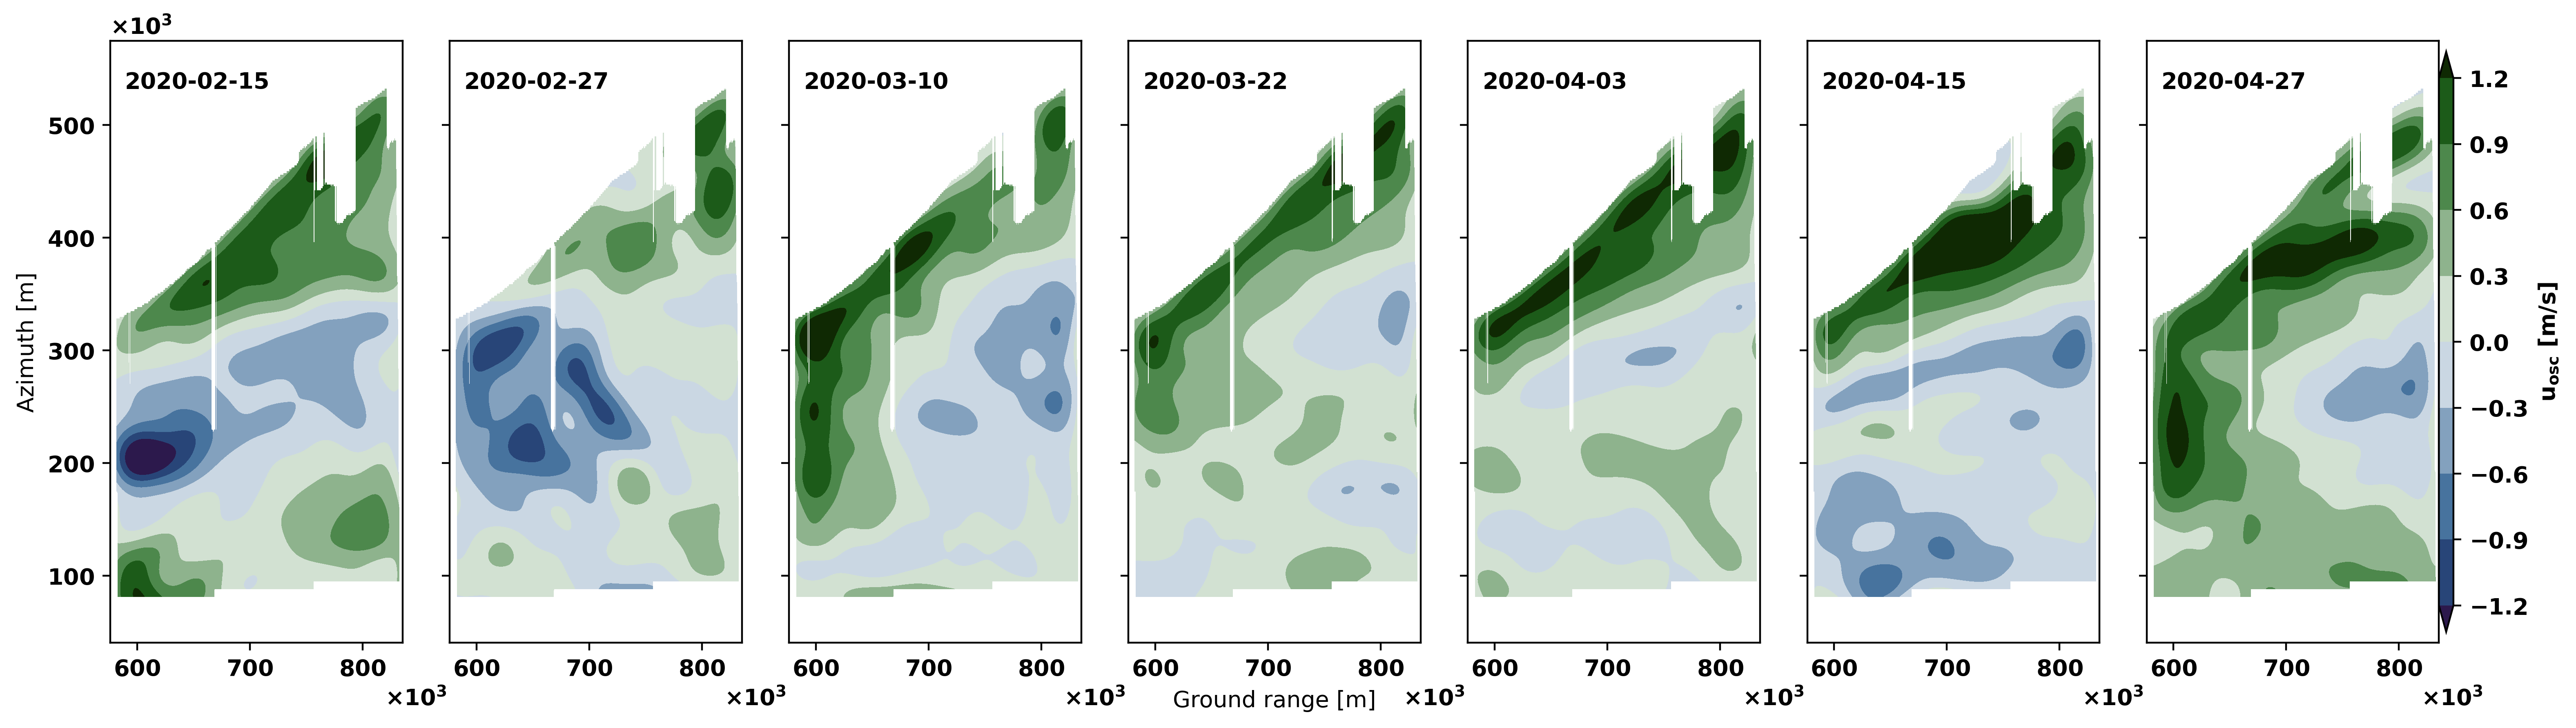

In [88]:
plt.rcParams.update({'font.size': 10, 'font.weight' : 'bold'})

# fig, axes = plt.subplots(ny, nx, figsize = (14, 6), sharex=True, sharey=True)
a = ds_res['currents'].sel(slow_time = slice(0, 575E3)).plot.contourf(x='grg', y = 'slow_time', col = 'time', 
                                                             vmin = -1.2,
                                                             vmax = 1.2,
                                                             levels = 9,
                                                             robust = True, 
                                                             cmap = cmc.cork, 
                                                             figsize = (18,6), 
                                                             cbar_kwargs = {'label':r'$\mathrm{u_{osc}\ [m/s]}$',
                                                                            'shrink':0.7,
                                                                            'aspect':40, 
                                                                            'pad' : 0.0, 
                                                                            'extend':'both'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]
_ = [ax.ticklabel_format(useMathText=True, axis = 'both', style='sci', scilimits=(3,3)) for ax in a.axs.ravel()]
nx = len(a.axs.ravel()); ny = 1
x_labels = [''] * 3 + ['Ground range [m]'] + [''] * 3 
y_labels = (['Azimuth [m]'] + [''] * (nx - 1)) * ny
# _ = [ax.axes.set_title(i) for ax, i in zip(axes.ravel(), titles)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(a.axs.ravel(), x_labels)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(a.axs.ravel(), x_labels)]
_ = [ax.axes.set_title('') for ax in a.axs.ravel()]
_ = [ax.axes.set_ylabel(i) for ax, i in zip(a.axs.ravel(), y_labels)]
_ = [ax.axes.get_xaxis().get_offset_text().set_position((1.15,40)) for ax in a.axs.ravel()]
labels = [f'{i[8:12]}-{i[12:14]}-{i[14:16]}' for i in scenarios]
_ = [ax.text(0.05, 0.95, label, fontsize=10, transform=ax.transAxes, va='top') for ax, label in zip(a.axs.ravel(), labels)]

a.fig.set_dpi(400.0) 

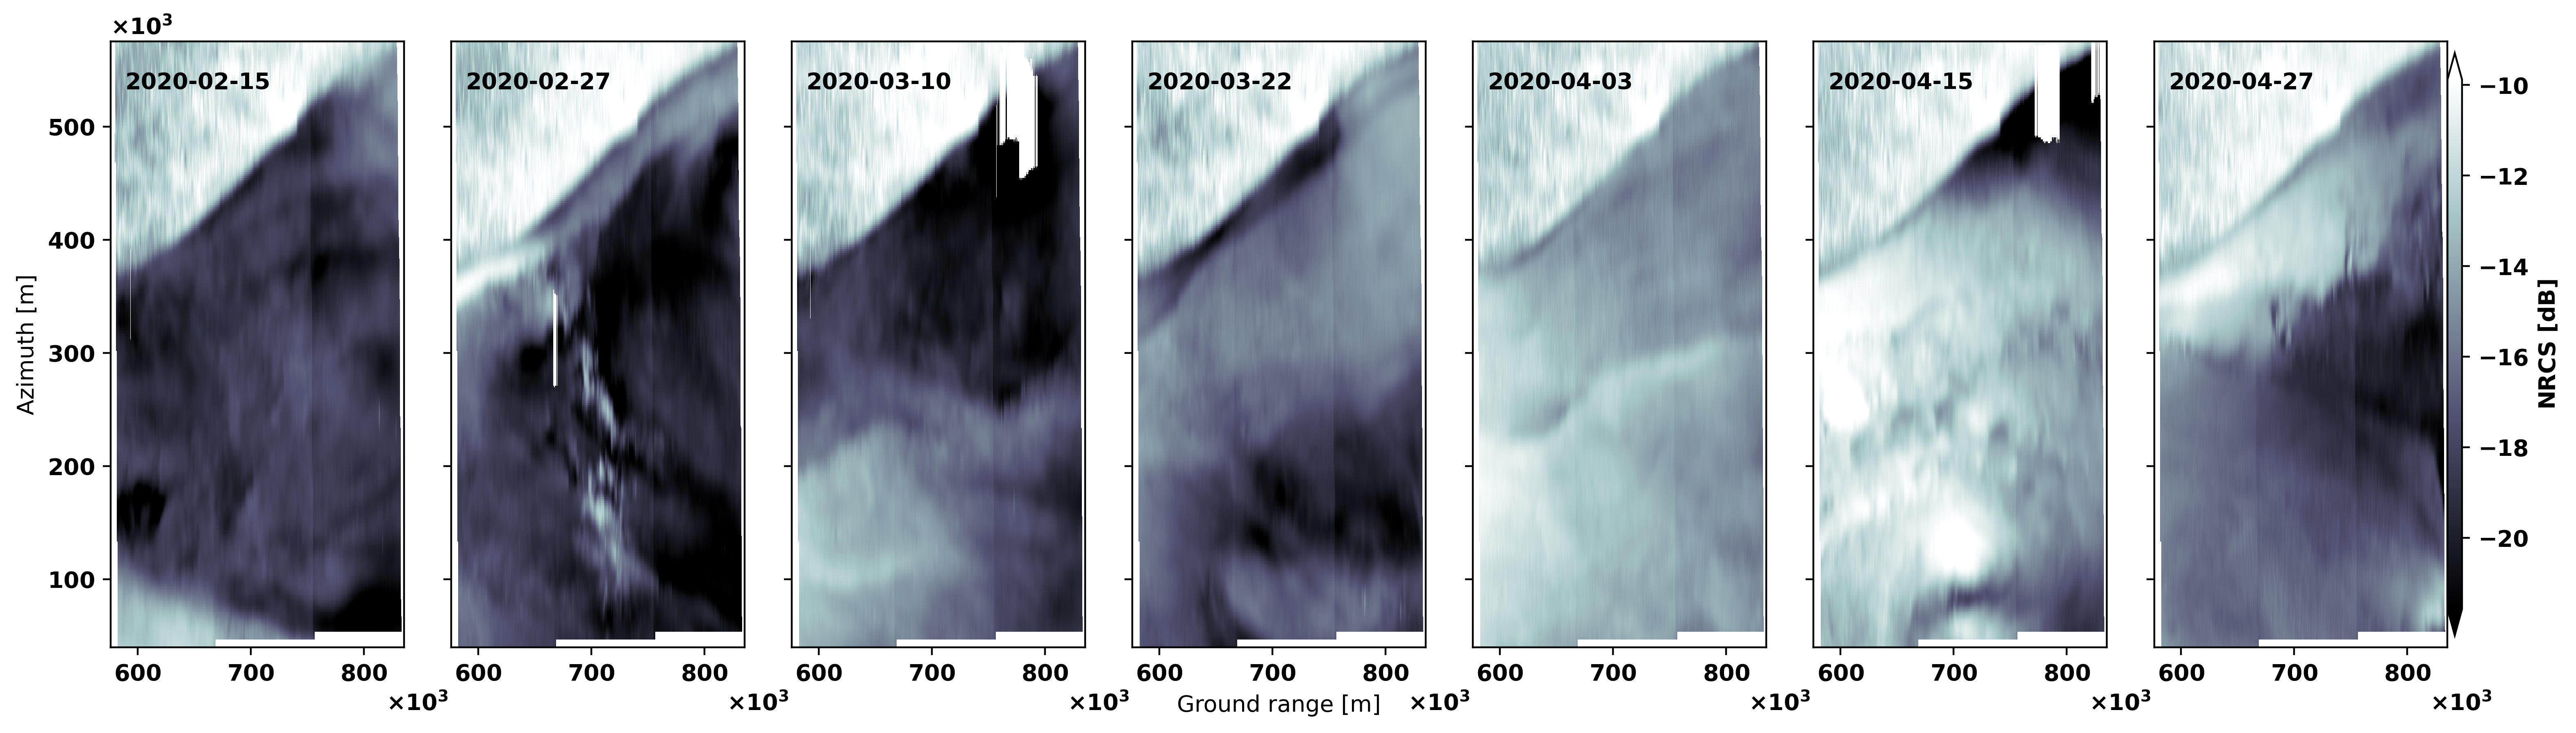

In [77]:
plt.rcParams.update({'font.size': 10, 'font.weight' : 'bold'})

# fig, axes = plt.subplots(ny, nx, figsize = (14, 6), sharex=True, sharey=True)
a = (10*np.log10(ds_res['nrcs'])).sel(slow_time = slice(0, 575E3)).plot(x='grg', y = 'slow_time', col = 'time', 
                                                            #  vmin = -1.2,
                                                            #  vmax = 1.2,
                                                            #  levels = 9,
                                                             robust = True, 
                                                             cmap = 'bone', 
                                                             figsize = (18,6), 
                                                             cbar_kwargs = {'label':r'$\mathrm{NRCS\ [dB]}$',
                                                                            'shrink':0.7,
                                                                            'aspect':40, 
                                                                            'pad' : 0.0, 
                                                                            'extend':'both'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]
_ = [ax.ticklabel_format(useMathText=True, axis = 'both', style='sci', scilimits=(3,3)) for ax in a.axs.ravel()]
nx = len(a.axs.ravel()); ny = 1
x_labels = [''] * 3 + ['Ground range [m]'] + [''] * 3 
y_labels = (['Azimuth [m]'] + [''] * (nx - 1)) * ny
# _ = [ax.axes.set_title(i) for ax, i in zip(axes.ravel(), titles)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(a.axs.ravel(), x_labels)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(a.axs.ravel(), x_labels)]
_ = [ax.axes.set_title('') for ax in a.axs.ravel()]
_ = [ax.axes.set_ylabel(i) for ax, i in zip(a.axs.ravel(), y_labels)]
_ = [ax.axes.get_xaxis().get_offset_text().set_position((1.15,40)) for ax in a.axs.ravel()]
labels = [f'{i[8:12]}-{i[12:14]}-{i[14:16]}' for i in scenarios]
_ = [ax.text(0.05, 0.95, label, fontsize=10, transform=ax.transAxes, va='top') for ax, label in zip(a.axs.ravel(), labels)]

a.fig.set_dpi(400.0) 

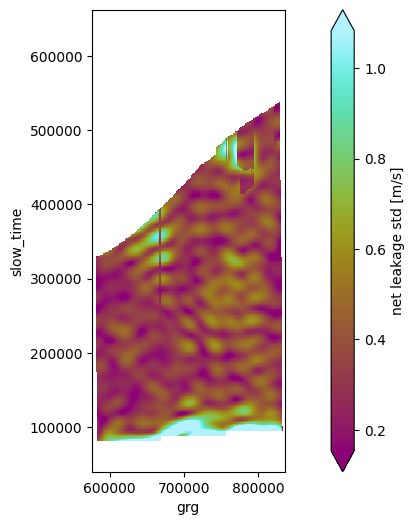

In [13]:
a = ds_residual_std.T.plot(robust = True, cmap = cmc.hawaii, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

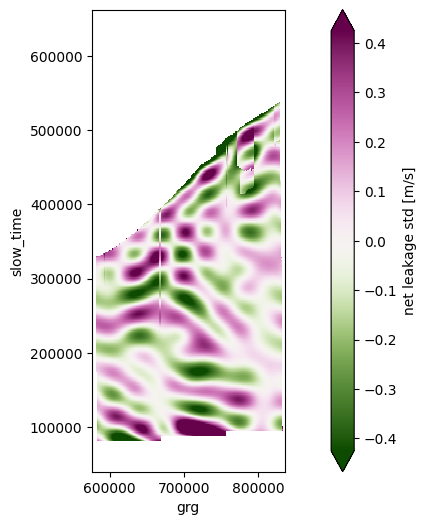

In [14]:
a = ds_residual_mean.T.plot(robust = True, cmap = cmc.bam_r, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

In [15]:
def signal_2_noise_ratio(signal, noise):
    return signal**2 / noise**2

def to_decibel(x):
    return 10*np.log10(x)

def from_decibel(x):
    return 10**(x/10)

In [51]:
snr = to_decibel(signal_2_noise_ratio(signal=ds_res['currents'], noise=ds_res['residual']))

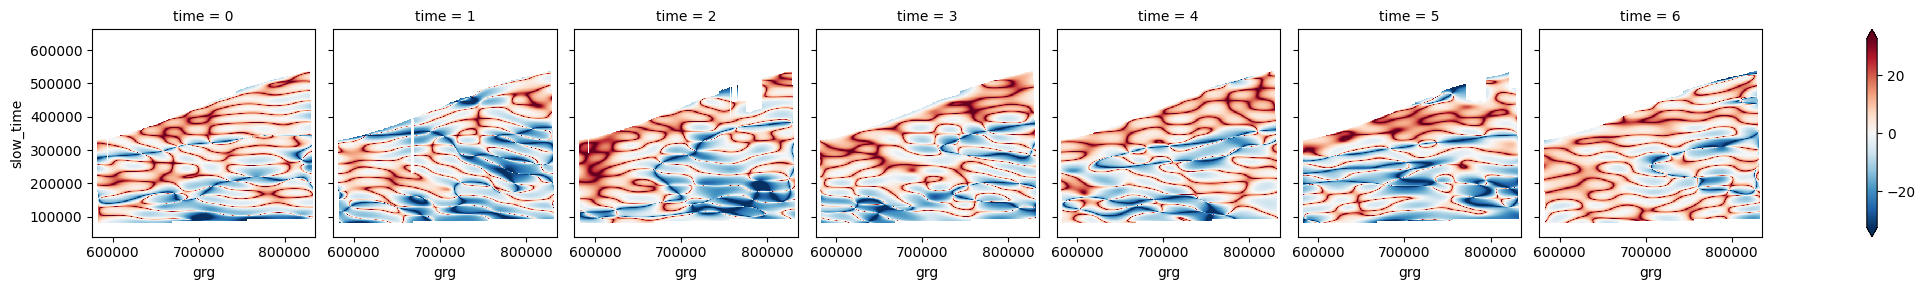

In [52]:
snr.plot(x = 'grg', y='slow_time', col = 'time', robust = True)

individual SNR 2.7965502912340146 13.41850187012423
individual SNR -2.9495260015913893 14.517529716866505
individual SNR 0.3161463839587974 16.23248482588108
individual SNR 1.8465442763625302 14.49408850793476
individual SNR 2.1182312206019547 14.21106142176208
individual SNR -0.3355024966021145 15.433636935813452
individual SNR 5.024014766894676 11.973416569173567
average SNR 1.2732030933931864 14.561892266973212
SNR of averaged 3.3779627157945766 14.840129466668262


Text(0, 0.5, 'Relative occurence')

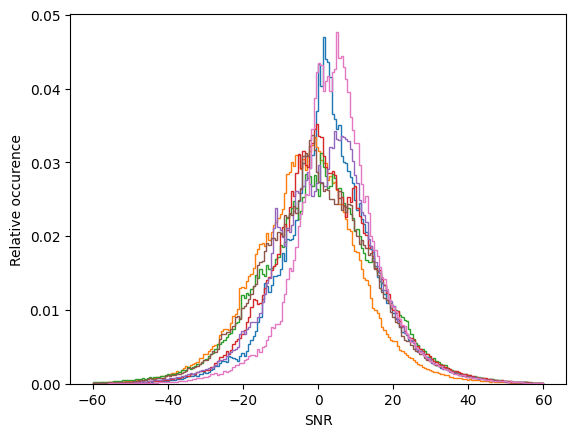

In [53]:
plt.figure()
for i in range(snr.sizes['time']):
    _ = snr.isel(time = i).plot.hist(bins = 200, range = (-60, 60), alpha = 1, density = True, histtype = 'step')
    print('individual SNR', np.nanmean(snr.isel(time = i)), np.nanstd(snr.isel(time = i)))
# plt.title('Signal to noise distribution')
print('average SNR', np.nanmean(snr), np.nanstd(snr))

snr_of_mean = to_decibel(signal_2_noise_ratio(signal=ds_currents_mean, noise=ds_residual_mean))
print('SNR of averaged', np.nanmean(snr_of_mean), np.nanstd(snr_of_mean))
plt.xlabel('SNR')
plt.ylabel('Relative occurence')